# Project Title: Classifying The Credit Scores

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report,r2_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Bank Data.csv")

In [ ]:
def des_analysis(dataframe):
    methods = {
        "shape": lambda: print(dataframe.shape),
        "columns": lambda: print(dataframe.columns),
        "info": lambda: print(dataframe.info()),
        "Descriptive": lambda: print(dataframe.describe().T),
        "Null_values": lambda: print(dataframe.isnull().sum()),
        "Unique_Values": lambda: print(dataframe.nunique()),
        "Data_types": lambda: print(dataframe.dtypes),
        "Duplicate_Values": lambda: print(dataframe.duplicated().sum())
    }
    for method in methods:
        print(
            f"---------------------------- {method} ------------------------------------------\n"
        )
        if method in methods:
            methods[method]()
            print("\n")

In [ ]:
des_analysis(df)

---------------------------- shape ------------------------------------------

(23913, 27)


---------------------------- columns ------------------------------------------

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')


---------------------------- info ------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23913 entries, 0 to 23912
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------

In [ ]:
df.describe().T

count         mean          std         min  \
Monthly_Inhand_Salary     20283.0  4217.473841  3208.483345  319.556250   
Num_Bank_Accounts         23913.0    16.745118   114.742259   -1.000000   
Num_Credit_Card           23913.0    23.503199   131.151111    0.000000   
Interest_Rate             23913.0    67.194580   447.819488    1.000000   
Delay_from_due_date       23913.0    21.081629    14.843111   -5.000000   
Num_Credit_Inquiries      23413.0    31.104643   200.288251    0.000000   
Credit_Utilization_Ratio  23913.0    32.275349     5.088243   20.509652   
Total_EMI_per_month       23913.0  1480.109881  8570.511705    0.000000   

                                  25%          50%          75%           max  
Monthly_Inhand_Salary     1632.145833  3099.872500  5982.876667  15136.696667  
Num_Bank_Accounts            3.000000     6.000000     7.000000   1798.000000  
Num_Credit_Card              4.000000     6.000000     7.000000   1499.000000  
Interest_Rate                7.000000    13.000000    20.000000   5799.000000  
Delay_from_due_date         10.000000    18.000000    28.000000     67.000000  
Num_Credit_Inquiries         4.000000     7.000000    10.000000   2593.000000  
Credit_Utilization_Ratio    28.093262    32.243890    36.445510     48.540663  
Total_EMI_per_month         33.259454    75.496032   177.172430  82347.000000

In [ ]:
#Check statistical values for fields with other than numerical datatype
df.describe(exclude=np.number).T

count unique                               top   freq
ID                       23913  23913                            0x160a      1
Customer_ID              23913   5979                         CUS_0xd40      4
Month                    23913      4                         September   5979
Name                     21451   5381                     Nate Raymondw     16
Age                      23913    535                                35    700
SSN                      23913   5980                         #F%$D@*&8   1367
Occupation               23913     16                           _______   1642
Annual_Income            23913   7694                         109945.32      8
Num_of_Loan              23913    143                                 2   3544
Type_of_Loan             21189   3341               Credit-Builder Loan    328
Num_of_Delayed_Payment   22180    254                                19   1272
Changed_Credit_Limit     23913   3237                                 _    512
Credit_Mix               23913      4                          Standard   8621
Outstanding_Debt         23913   6118                            1151.7     12
Credit_History_Age       21796    399             20 Years and 1 Months    129
Payment_of_Min_Amount    23913      3                               Yes  12575
Amount_invested_monthly  22845  21792                         __10000__   1005
Payment_Behaviour        23913      8    Low_spent_Small_value_payments   6032
Monthly_Balance          23623  23621  __-333333333333333333333333333__      3

In [ ]:
def get_column_details(df,column):
    print("Details of",column,"column")

    #DataType of column
    print("\nDataType: ",df[column].dtype)

    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())

    #Get Distribution of Column
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

In [ ]:
def fill_missing_with_group_mode(df, groupby, column):
    print("\nNo. of missing values before filling with group mode:",df[column].isnull().sum())

    # Fill with local mode
    #mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iat[0])
    mode_per_group = df.groupby(groupby)[column].transform(
        lambda x: x.mode().iat[0] if not x.mode().empty else np.nan)
    df[column] = df[column].fillna(mode_per_group)

    print("\nNo. of missing values after filling with group mode:",df[column].isnull().sum())

In [ ]:
#Method to clean categorical field

def clean_categorical_field(df,groupby,column,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")

    #Replace with np.nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    #For each Customer_ID, assign same value for the column
    fill_missing_with_group_mode(df,groupby,column)

In [ ]:
# Handle Outliers and null values
def fix_inconsistent_values(df, groupby, column):
    print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')

    df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
    x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
    mini, maxi = x[0], y[0]

    # assign Wrong Values to NaN
    col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)|(x<0)) else x)

    # fill with local mode
    mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    df[column] = col.fillna(mode_by_group)
    df[column].fillna(df[column].mean(),inplace=True)

    print("\nAfter Cleaning Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')
    print("\nNo. of Unique values after Cleaning:",df[column].nunique())
    print("\nNo. of Null values after Cleaning:",df[column].isnull().sum())

In [ ]:
#Method to clean Numerical Field
def clean_numerical_field(df,groupby,column,strip=None,datatype=None,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")

    #Replace with np.nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    # Remove trailing & leading special characters
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\nTrailing & leading {strip} are removed")

    # Change datatype
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    fix_inconsistent_values(df, groupby, column)

In [ ]:
def plot_countplot(df,column,user_friendly_column_name,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.countplot(data=df, x=column)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [ ]:
def plot_displot(df,column,user_friendly_column_name,rotation=0,bins=20):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [ ]:
def plot_stacked_bar(df,column1,column2,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{column1} & {column2} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)

    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

# Data cleaning and observation

Details of Credit_Mix column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Standard    8621
Good        5912
_           4781
Bad         4599
Name: Credit_Mix, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

No. of missing values before filling with group mode: 4781

No. of missing values after filling with group mode: 45

-----------------------------------------------------

Credit_Mix & Credit_Mix Distribution


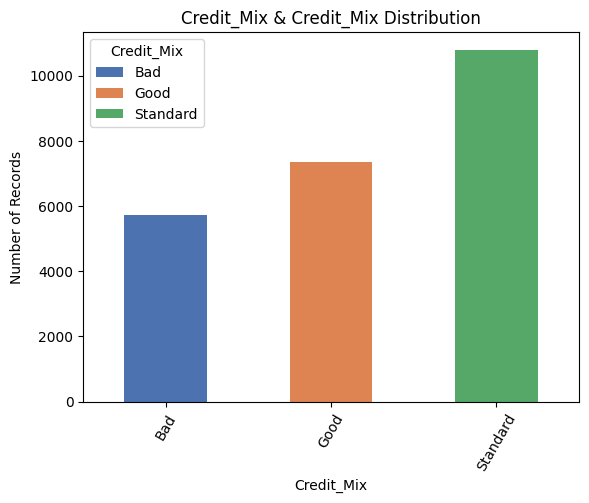

In [ ]:
#Credit_Mix
column_name = 'Credit_Mix'
group_by = 'Customer_ID'
garbage_value = '_'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df,column_name,'Credit_Mix',rotation=60)

In [ ]:
#Name
column_name = 'Name'
group_by = 'Customer_ID'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name)

Details of Name column

DataType:  object

There are  2462  null values

Number of Unique Values:  5381

Distribution of column:

Nate Raymondw        16
Jonesb               15
Valetkevitchv        15
ra Alperq            13
Carolineg            13
                     ..
Phil Wahbat           1
Andreas Cremerh       1
Kerberj               1
Alexei Oreskovicn     1
Philt                 1
Name: Name, Length: 5381, dtype: int64

-----------------------------------------------------

Cleaning steps 

No. of missing values before filling with group mode: 2462

No. of missing values after filling with group mode: 0


In [ ]:
#SSN
column_name = 'SSN'
group_by = 'Customer_ID'
garbage_value = '#F%$D@*&8'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

Details of SSN column

DataType:  object

There are no null values

Number of Unique Values:  5980

Distribution of column:

#F%$D@*&8      1367
821-00-0265       4
300-81-0244       4
300-94-2533       4
554-38-9690       4
               ... 
879-76-2190       1
789-15-7049       1
611-21-4406       1
715-49-4883       1
033-52-4312       1
Name: SSN, Length: 5980, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value #F%$D@*&8 is replaced with np.nan

No. of missing values before filling with group mode: 1367

No. of missing values after filling with group mode: 0


Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

_______          1642
Architect        1569
Lawyer           1551
Mechanic         1551
Scientist        1517
Teacher          1510
Engineer         1504
Entrepreneur     1494
Developer        1487
Media_Manager    1484
Doctor           1467
Writer           1462
Journalist       1460
Manager          1453
Musician         1401
Accountant       1361
Name: Occupation, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _______ is replaced with np.nan

No. of missing values before filling with group mode: 1642

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Occupation & Credit_Mix Distribution


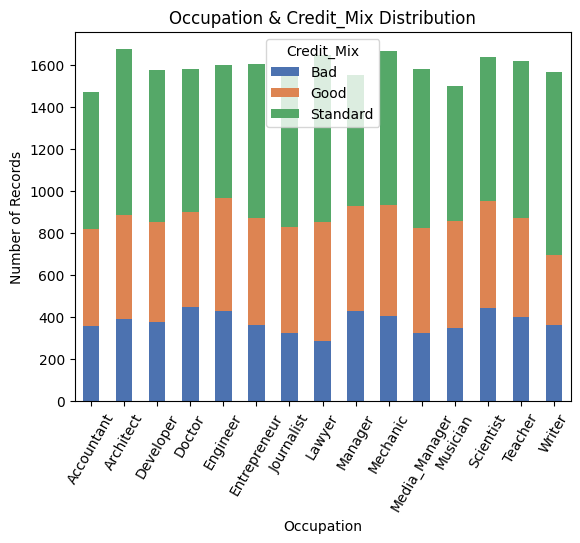

In [ ]:
#Occupation
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'
user_friendly_name = 'Occupation'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df,column_name,'Credit_Mix',rotation=60)

In [ ]:
#Get Details of Type of Loan column
get_column_details(df,'Type_of_Loan')

Details of Type_of_Loan column

DataType:  object

There are  2724  null values

Number of Unique Values:  3341

Distribution of column:

Credit-Builder Loan                                                                                                                                    328
Not Specified                                                                                                                                          320
Debt Consolidation Loan                                                                                                                                288
Mortgage Loan                                                                                                                                          276
Payday Loan                                                                                                                                            264
                                                                                       

In [ ]:
#Handle Type of Loan null values
df['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)

Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Yes    12575
No      8515
NM      2823
Name: Payment_of_Min_Amount, dtype: int64

-----------------------------------------------------

Payment_of_Min_Amount & Credit_Mix Distribution


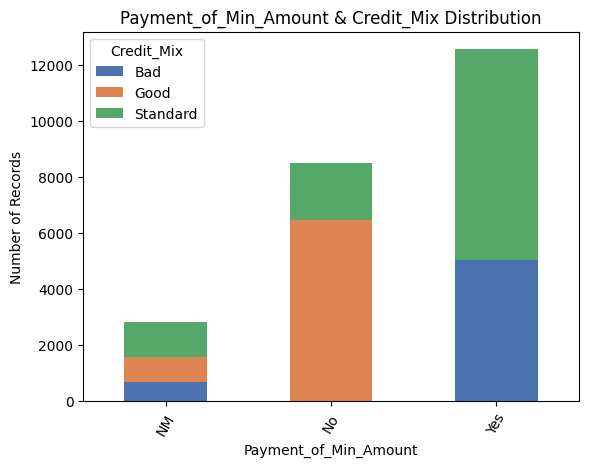

In [ ]:
column_name = 'Payment_of_Min_Amount'

#Get Details
get_column_details(df,column_name)

#Plot Distribution with Credit_Score
plot_stacked_bar(df,column_name,'Credit_Mix',rotation=60)

Details of Payment_Behaviour column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

Low_spent_Small_value_payments      6032
High_spent_Medium_value_payments    4207
High_spent_Large_value_payments     3329
Low_spent_Medium_value_payments     3232
High_spent_Small_value_payments     2785
Low_spent_Large_value_payments      2492
!@9#%8                              1835
High_sp                                1
Name: Payment_Behaviour, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value !@9#%8 is replaced with np.nan

No. of missing values before filling with group mode: 1835

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Payment_Behaviour & Credit_Mix Distribution


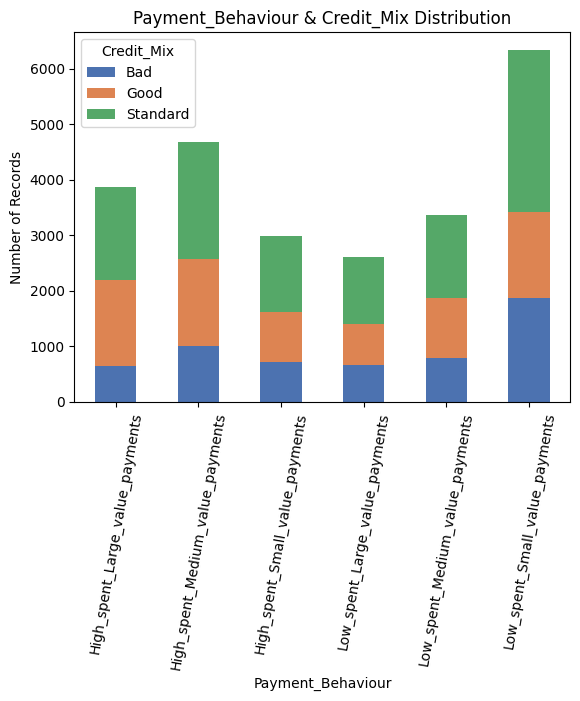

In [ ]:
#Payment_Behavior
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df,column_name,'Credit_Mix',rotation=80)

 Numerical Variables

Details of Age column

DataType:  object

There are no null values

Number of Unique Values:  535

Distribution of column:

35      700
37      696
39      695
32      693
29      687
       ... 
5549      1
2104      1
5621      1
3876      1
2816      1
Name: Age, Length: 535, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Age is changed to int

Existing Min, Max Values:
min    -500
max    8641
Name: Age, dtype: int64

After Cleaning Min, Max Values:
min   -500.0
max     56.0
Name: Age, dtype: float64

No. of Unique values after Cleaning: 44

No. of Null values after Cleaning: 0

-----------------------------------------------------

Age Distribution


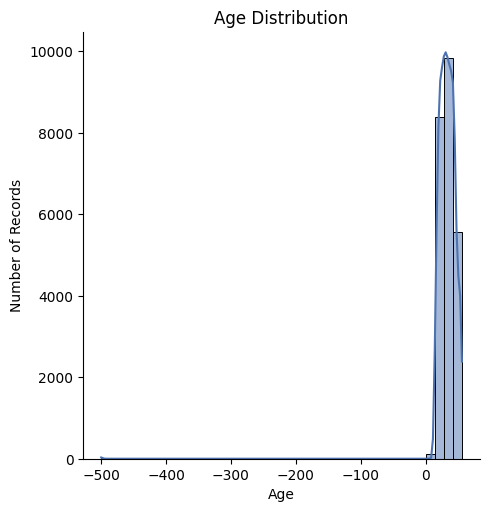

In [ ]:
column_name = 'Age'
group_by = 'Customer_ID'
user_friendly_name = 'Age'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype='int')

#Plot Graph
plot_displot(df,column_name,user_friendly_name,bins=40)

Details of Annual_Income column

DataType:  object

There are no null values

Number of Unique Values:  7694

Distribution of column:

109945.32    8
40341.16     7
19114.12     4
67097.28     4
73394.12     4
            ..
3101811.0    1
30155.09_    1
15858.64_    1
15375.09_    1
64923.04     1
Name: Annual_Income, Length: 7694, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Annual_Income is changed to float

Existing Min, Max Values:
min        7005.93
max    24137255.00
Name: Annual_Income, dtype: float64

After Cleaning Min, Max Values:
min      7005.93
max    179987.28
Name: Annual_Income, dtype: float64

No. of Unique values after Cleaning: 5977

No. of Null values after Cleaning: 0

-----------------------------------------------------

Annual Income Distribution


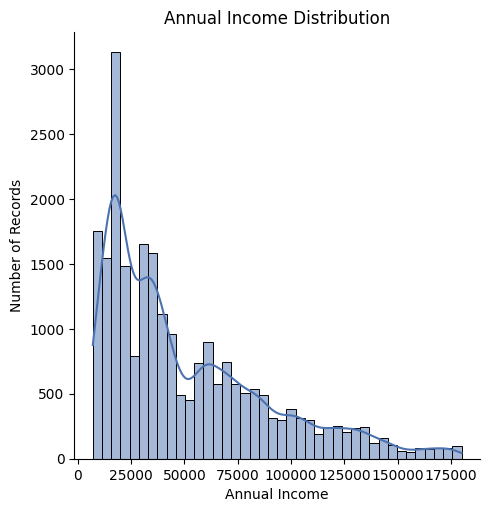

In [ ]:
#|Annual_Income
column_name = 'Annual_Income'
group_by = 'Customer_ID'
user_friendly_name = 'Annual Income'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype='float')

#Plot Graph
plot_displot(df,column_name,user_friendly_name,bins=40)

Details of Monthly_Inhand_Salary column

DataType:  float64

There are  3630  null values

Number of Unique Values:  6134

Distribution of column:

6082.187500     7
3080.555000     7
4387.272500     7
6535.543333     4
2543.123333     4
               ..
5651.540000     1
1464.544583     1
13088.623888    1
3637.360000     1
5513.253333     1
Name: Monthly_Inhand_Salary, Length: 6134, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min      319.556250
max    15136.696667
Name: Monthly_Inhand_Salary, dtype: float64

After Cleaning Min, Max Values:
min      319.556250
max    15136.696667
Name: Monthly_Inhand_Salary, dtype: float64

No. of Unique values after Cleaning: 6135

No. of Null values after Cleaning: 0

-----------------------------------------------------

Monthly Inhand Salary Distribution


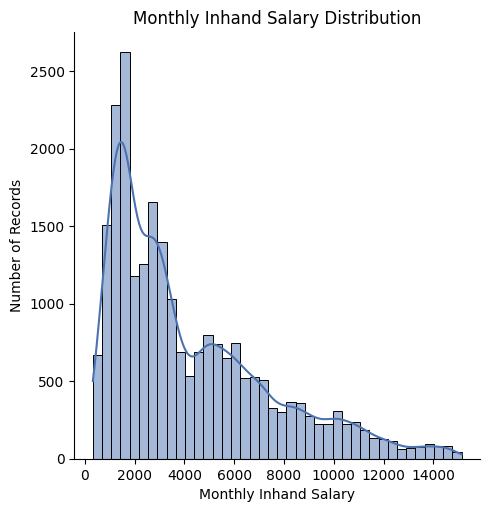

In [ ]:
#Monthly_Inhand_Salary
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Inhand Salary'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_displot(df,column_name,user_friendly_name,bins=40)

Details of Num_Bank_Accounts column

DataType:  int64

There are no null values

Number of Unique Values:  298

Distribution of column:

6       3145
8       3087
7       3065
5       2893
3       2854
        ... 
741        1
1371       1
495        1
810        1
1455       1
Name: Num_Bank_Accounts, Length: 298, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min      -1
max    1798
Name: Num_Bank_Accounts, dtype: int64

After Cleaning Min, Max Values:
min    -1.0
max    10.0
Name: Num_Bank_Accounts, dtype: float64

No. of Unique values after Cleaning: 12

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Bank Accounts Distribution


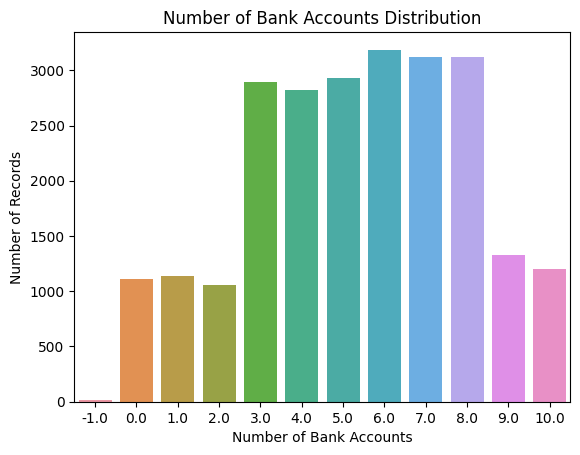

In [ ]:
#Num_Bank_Account
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Bank Accounts'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of Num_Credit_Card column

DataType:  int64

There are no null values

Number of Unique Values:  495

Distribution of column:

5       4335
7       4144
6       3976
4       3197
3       3172
        ... 
1242       1
1220       1
204        1
439        1
1009       1
Name: Num_Credit_Card, Length: 495, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

After Cleaning Min, Max Values:
min     0.0
max    11.0
Name: Num_Credit_Card, dtype: float64

No. of Unique values after Cleaning: 12

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Credit Card Distribution


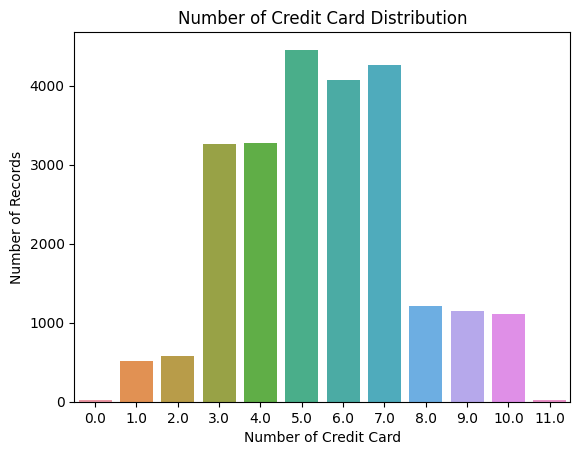

In [ ]:
#Num_Credit_Card
column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Card'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of Interest_Rate column

DataType:  int64

There are no null values

Number of Unique Values:  469

Distribution of column:

8       1202
5       1193
6       1152
12      1108
7       1090
        ... 
1191       1
1447       1
2112       1
1136       1
3936       1
Name: Interest_Rate, Length: 469, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       1
max    5799
Name: Interest_Rate, dtype: int64

After Cleaning Min, Max Values:
min     1.0
max    34.0
Name: Interest_Rate, dtype: float64

No. of Unique values after Cleaning: 34

No. of Null values after Cleaning: 0

-----------------------------------------------------

Interest Rate Distribution


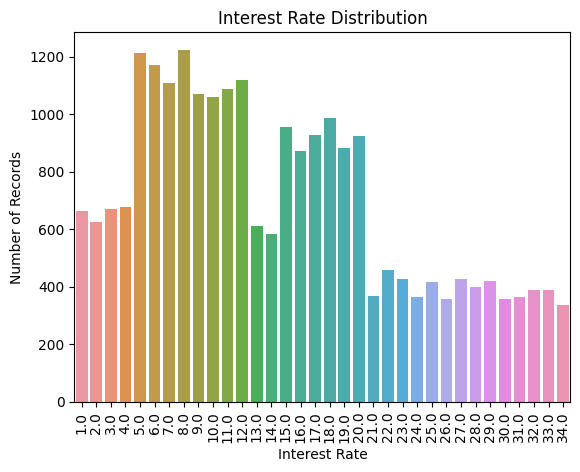

In [ ]:
#Interrest_Rate
column_name = 'Interest_Rate'
group_by = 'Customer_ID'
user_friendly_name = 'Interest Rate'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_countplot(df,column_name,user_friendly_name,rotation=90)

Details of Delay_from_due_date column

DataType:  int64

There are no null values

Number of Unique Values:  73

Distribution of column:

 12    841
 15    824
 13    817
 10    800
 14    785
      ... 
 65     11
 63      9
-5       7
 66      5
 67      2
Name: Delay_from_due_date, Length: 73, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min    -5
max    67
Name: Delay_from_due_date, dtype: int64

After Cleaning Min, Max Values:
min    -4.0
max    62.0
Name: Delay_from_due_date, dtype: float64

No. of Unique values after Cleaning: 67

No. of Null values after Cleaning: 0

-----------------------------------------------------

Delay from Due Date Distribution


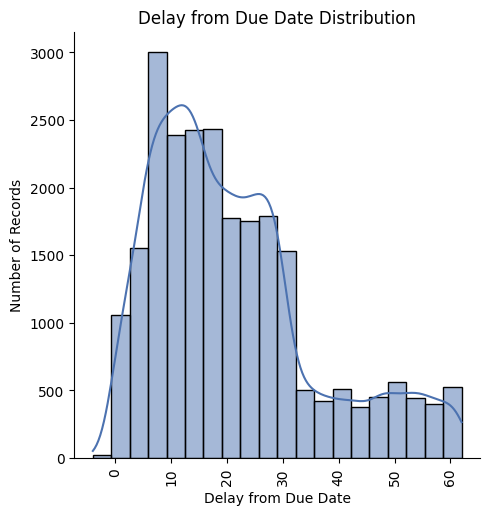

In [ ]:
#Delay_from_due_date
column_name = 'Delay_from_due_date'
group_by = 'Customer_ID'
user_friendly_name = 'Delay from Due Date'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=90)

Details of Num_of_Delayed_Payment column

DataType:  object

There are  1733  null values

Number of Unique Values:  254

Distribution of column:

19      1272
18      1267
15      1253
17      1229
16      1216
        ... 
1131       1
1544       1
4136       1
1377       1
3708       1
Name: Num_of_Delayed_Payment, Length: 254, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Num_of_Delayed_Payment is changed to float

Existing Min, Max Values:
min      -3.0
max    4399.0
Name: Num_of_Delayed_Payment, dtype: float64

After Cleaning Min, Max Values:
min    -3.0
max    28.0
Name: Num_of_Delayed_Payment, dtype: float64

No. of Unique values after Cleaning: 32

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Delayed Payment Distribution


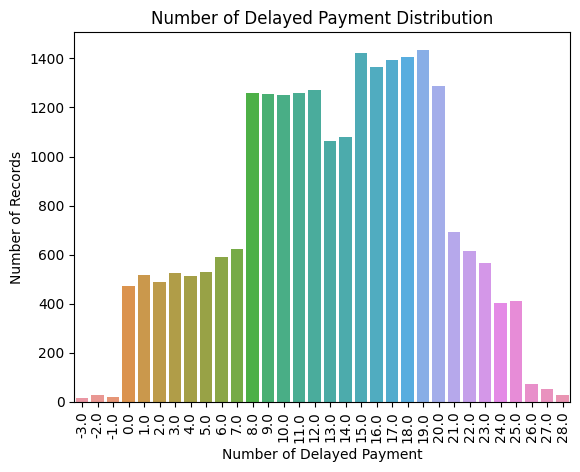

In [ ]:
#Num_of_Delayed_Payment
column_name = 'Num_of_Delayed_Payment'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Delayed Payment'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype='float')

#Plot Graph
plot_countplot(df,column_name,user_friendly_name,rotation=90)

Details of Changed_Credit_Limit column

DataType:  object

There are no null values

Number of Unique Values:  3237

Distribution of column:

_                       512
10.64                    38
7.01                     38
11.73                    37
9.13                     36
                       ... 
-0.23000000000000045      1
0.4699999999999998        1
33.97                     1
35.97                     1
-3.56                     1
Name: Changed_Credit_Limit, Length: 3237, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

Trailing & leading _ are removed

Datatype of Changed_Credit_Limit is changed to float

Existing Min, Max Values:
min    -6.45
max    35.97
Name: Changed_Credit_Limit, dtype: float64

After Cleaning Min, Max Values:
min    -6.28
max    29.98
Name: Changed_Credit_Limit, dtype: float64

No. of Unique values after Cleaning: 2913

No. of Null values after Cleaning: 0

--------------

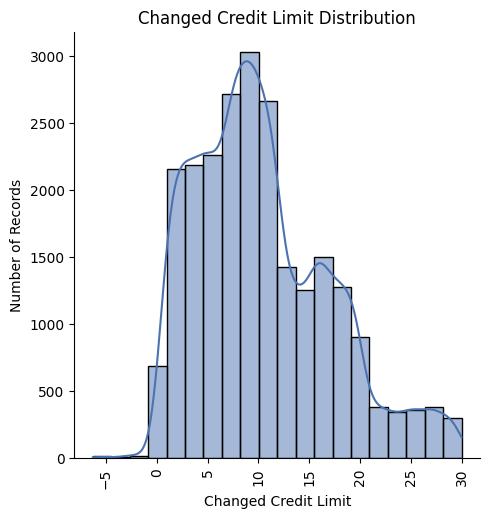

In [ ]:
#Change_Credit_Limit
column_name = 'Changed_Credit_Limit'
group_by = 'Customer_ID'
user_friendly_name = 'Changed Credit Limit'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype='float',replace_value='_')

#Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=90)

Details of Num_Credit_Inquiries column

DataType:  float64

There are  500  null values

Number of Unique Values:  397

Distribution of column:

5.0       2374
4.0       2169
7.0       1995
6.0       1959
8.0       1878
          ... 
1838.0       1
772.0        1
2077.0       1
803.0        1
1555.0       1
Name: Num_Credit_Inquiries, Length: 397, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       0.0
max    2593.0
Name: Num_Credit_Inquiries, dtype: float64

After Cleaning Min, Max Values:
min     0.0
max    17.0
Name: Num_Credit_Inquiries, dtype: float64

No. of Unique values after Cleaning: 18

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Credit Inquiries Distribution


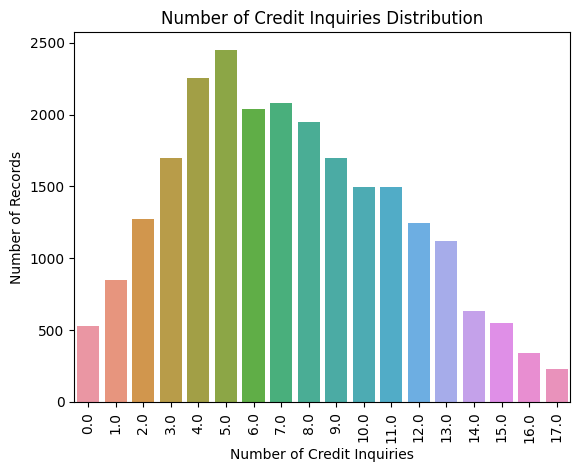

In [ ]:
#Num_Credit_Inquiries
column_name = 'Num_Credit_Inquiries'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Inquiries'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_countplot(df,column_name,user_friendly_name,rotation=90)

Details of Outstanding_Debt column

DataType:  object

There are no null values

Number of Unique Values:  6118

Distribution of column:

1151.7      12
1217.99      8
255.76       8
482.88       8
462.11       8
            ..
181.47_      1
2432.07_     1
221.7_       1
3421.09_     1
370.4        1
Name: Outstanding_Debt, Length: 6118, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Outstanding_Debt is changed to <class 'float'>

Existing Min, Max Values:
min       0.54
max    4998.07
Name: Outstanding_Debt, dtype: float64

After Cleaning Min, Max Values:
min       0.54
max    4998.07
Name: Outstanding_Debt, dtype: float64

No. of Unique values after Cleaning: 5898

No. of Null values after Cleaning: 0

-----------------------------------------------------

Outstanding Debt Distribution


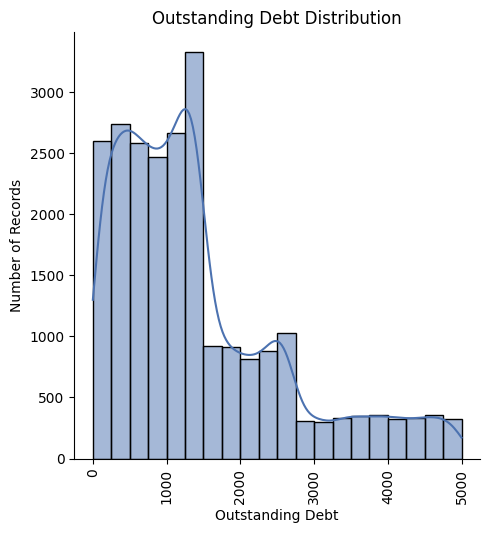

In [ ]:
#Outstanding_Debt
column_name = 'Outstanding_Debt'
group_by = 'Customer_ID'
user_friendly_name = 'Outstanding Debt'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype=float)

#Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=90)

Details of Credit_Utilization_Ratio column

DataType:  float64

There are no null values

Number of Unique Values:  23913

Distribution of column:

35.030402    1
27.848145    1
26.898801    1
36.207499    1
37.948912    1
            ..
33.182789    1
32.850282    1
33.888110    1
31.115091    1
30.725291    1
Name: Credit_Utilization_Ratio, Length: 23913, dtype: int64

-----------------------------------------------------

Credit Utilization Ratio Distribution


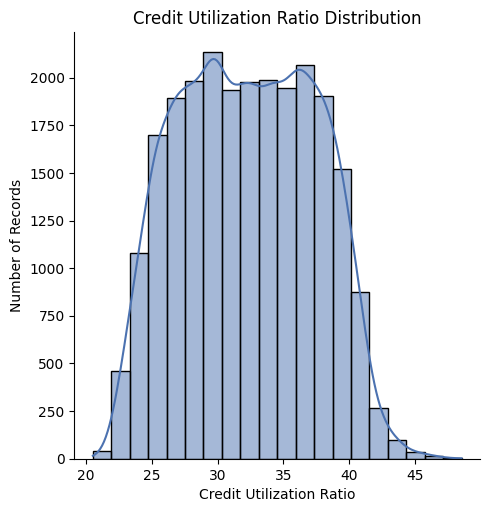

In [ ]:
#Credit_utiilization_Ratio
column_name = 'Credit_Utilization_Ratio'
group_by = 'Customer_ID'
user_friendly_name = 'Credit Utilization Ratio'

#Get Details
get_column_details(df,column_name)

#Plot Graph
plot_displot(df,column_name,user_friendly_name)

In [ ]:
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val

df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)

Details of Credit_History_Age column

DataType:  float64

There are  2117  null values

Number of Unique Values:  399

Distribution of column:

241.0    129
229.0    121
235.0    119
193.0    119
240.0    119
        ... 
11.0      10
53.0       9
10.0       7
408.0      6
407.0      6
Name: Credit_History_Age, Length: 399, dtype: int64

-----------------------------------------------------

Cleaning steps 

Datatype of Credit_History_Age is changed to <class 'float'>

Existing Min, Max Values:
min     10.0
max    408.0
Name: Credit_History_Age, dtype: float64

After Cleaning Min, Max Values:
min     10.0
max    405.0
Name: Credit_History_Age, dtype: float64

No. of Unique values after Cleaning: 396

No. of Null values after Cleaning: 0

-----------------------------------------------------

Credit History Age Distribution


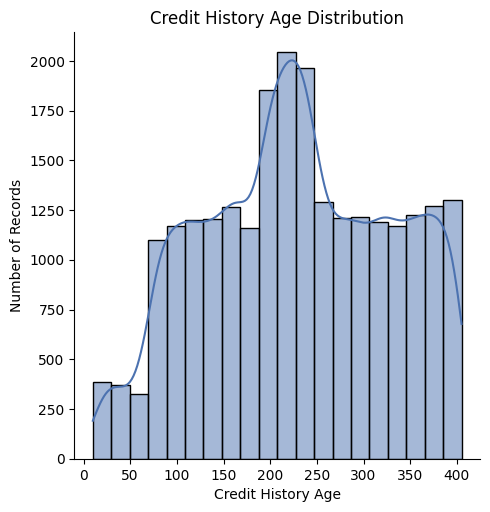

In [ ]:
#Credit_History_Age
column_name = 'Credit_History_Age'
group_by = 'Customer_ID'
user_friendly_name = 'Credit History Age'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,datatype=float)

#Plot Graph
plot_displot(df,column_name,user_friendly_name)

Details of Total_EMI_per_month column

DataType:  float64

There are no null values

Number of Unique Values:  6299

Distribution of column:

0.000000        2400
49.574949          4
68.348799          4
58.057871          4
36.628734          4
                ... 
74216.000000       1
36852.000000       1
46250.000000       1
10614.000000       1
156.604085         1
Name: Total_EMI_per_month, Length: 6299, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min        0.0
max    82347.0
Name: Total_EMI_per_month, dtype: float64

After Cleaning Min, Max Values:
min       0.000000
max    1779.103254
Name: Total_EMI_per_month, dtype: float64

No. of Unique values after Cleaning: 5530

No. of Null values after Cleaning: 0

-----------------------------------------------------

Total EMI per month Distribution


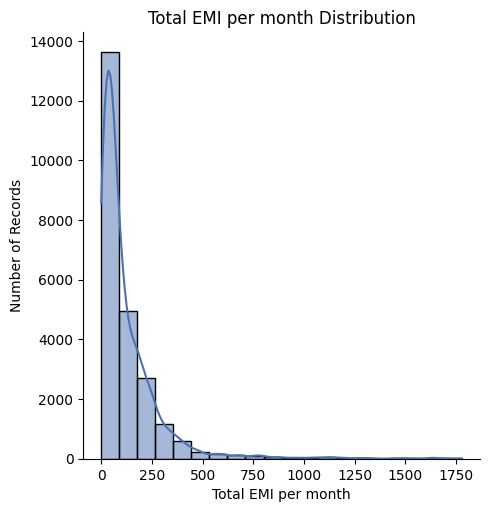

In [ ]:
#Total_EMI_per_month
column_name = 'Total_EMI_per_month'
group_by = 'Customer_ID'
user_friendly_name = 'Total EMI per month'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name)

#Plot Graph
plot_displot(df,column_name,user_friendly_name)

Details of Amount_invested_monthly column

DataType:  object

There are  1068  null values

Number of Unique Values:  21792

Distribution of column:

__10000__             1005
0.0                     50
236.64268203272135       1
331.94780721586665       1
16.099414546943294       1
                      ... 
123.50876651277399       1
278.5930686114261        1
76.48414078232469        1
135.5016450856912        1
79.09610977520721        1
Name: Amount_invested_monthly, Length: 21792, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Amount_invested_monthly is changed to <class 'float'>

Existing Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

After Cleaning Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

No. of Unique values after Cleaning: 21792

No. of Null values after Cleaning: 0

--------------------------

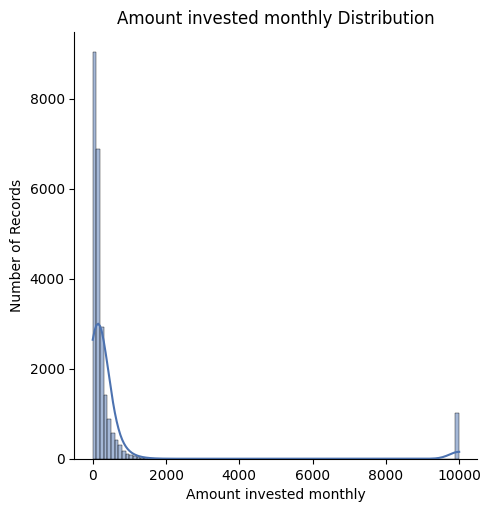

In [ ]:
#Amount_invested_monthly
column_name = 'Amount_invested_monthly'
group_by = 'Customer_ID'
user_friendly_name = 'Amount invested monthly'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,datatype=float,strip='_')

#Plot Graph
plot_displot(df,column_name,user_friendly_name,bins=100)

Details of Monthly_Balance column

DataType:  object

There are  290  null values

Number of Unique Values:  23621

Distribution of column:

__-333333333333333333333333333__    3
186.26670208571772                  1
909.589950370642                    1
389.5014473863218                   1
209.41176215488983                  1
                                   ..
146.96088496968582                  1
220.49493010079638                  1
326.21585037328566                  1
230.23906227776158                  1
847.9704671714677                   1
Name: Monthly_Balance, Length: 23621, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value __-333333333333333333333333333__ is replaced with np.nan

Trailing & leading _ are removed

Datatype of Monthly_Balance is changed to <class 'float'>

Existing Min, Max Values:
min       0.103402
max    1606.518192
Name: Monthly_Balance, dtype: float64

After Cleaning Min, Max Values:
min       0.10340

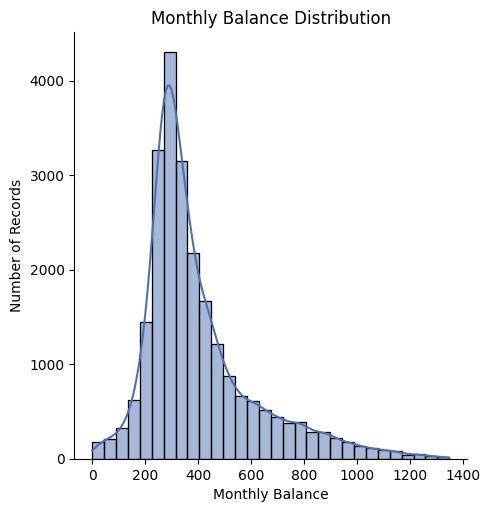

In [ ]:
#Monthly_Balance
column_name = 'Monthly_Balance'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Balance'

#Get Details
get_column_details(df,column_name)

#Cleaning
df[column_name].replace('',np.nan)
clean_numerical_field(df,group_by,column_name,strip='_',datatype=float,replace_value='__-333333333333333333333333333__')

#Plot Graph
plot_displot(df,column_name,user_friendly_name,bins=30)

Details of Num_of_Loan column

DataType:  object

There are no null values

Number of Unique Values:  143

Distribution of column:

2       3544
3       3464
4       3442
0       2472
1       2228
        ... 
181        1
720        1
949        1
95         1
1471       1
Name: Num_of_Loan, Length: 143, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Num_of_Loan is changed to <class 'float'>

Existing Min, Max Values:
min    -100.0
max    1496.0
Name: Num_of_Loan, dtype: float64

After Cleaning Min, Max Values:
min   -100.0
max      9.0
Name: Num_of_Loan, dtype: float64

No. of Unique values after Cleaning: 11

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Loan Distribution


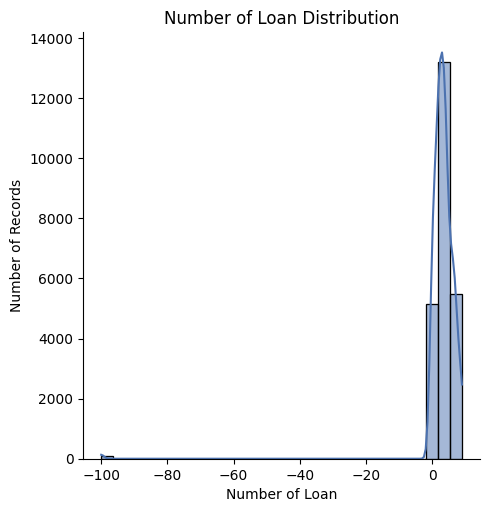

In [ ]:
#Num_of_Loan
column_name = 'Num_of_Loan'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Loan'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype=float)

#Plot Graph
plot_displot(df,column_name,user_friendly_name,bins=30)

In [ ]:
def get_value(data):
    for i in data.columns:
        print('Column Name: ' + i)
        print(data[i].value_counts(dropna=False))
        print("\n")

In [ ]:
get_value(df)

Column Name: ID
0x160a     1
0xd0cd     1
0xd0ee     1
0xd0e5     1
0xd0e4     1
          ..
0x736b     1
0x736a     1
0x7361     1
0x7360     1
0x12e42    1
Name: ID, Length: 23913, dtype: int64


Column Name: Customer_ID
CUS_0xd40     4
CUS_0x9f43    4
CUS_0x1f15    4
CUS_0x2d1e    4
CUS_0x3420    4
             ..
CUS_0x330c    4
CUS_0xa0f4    4
CUS_0x9c80    4
CUS_0xc516    4
CUS_0x42a     1
Name: Customer_ID, Length: 5979, dtype: int64


Column Name: Month
September    5979
October      5978
November     5978
December     5978
Name: Month, dtype: int64


Column Name: Name
Nate Raymondw          20
ra Alperq              16
Carolineg              16
Valetkevitchv          16
Jonesb                 16
                       ..
Costa Annb              4
Margaret Chadbourna     4
Whiten                  4
Rick Rothackerf         4
Philt                   1
Name: Name, Length: 5381, dtype: int64


Column Name: Age
 32.0     764
 39.0     746
 35.0     746
 29.0     743
 37.0     741
 

In [ ]:
#age has negetive value
df.loc[df["Age"] < 0, "Age"] = np.NAN
#Cleaning
clean_numerical_field(df,group_by,column_name,strip='_',datatype='int')


-----------------------------------------------------

Cleaning steps 

Datatype of Num_of_Loan is changed to int

Existing Min, Max Values:
min   -100
max      9
Name: Num_of_Loan, dtype: int64

After Cleaning Min, Max Values:
min   -100.0
max      9.0
Name: Num_of_Loan, dtype: float64

No. of Unique values after Cleaning: 11

No. of Null values after Cleaning: 0


In [ ]:
df['Age'].value_counts()

32.0    764
39.0    746
35.0    746
29.0    743
37.0    741
22.0    728
33.0    721
27.0    716
31.0    705
30.0    705
41.0    705
26.0    700
25.0    698
42.0    694
28.0    694
36.0    684
43.0    684
20.0    683
24.0    675
19.0    670
21.0    654
44.0    650
34.0    642
40.0    637
23.0    622
38.0    608
45.0    582
46.0    579
16.0    421
15.0    409
18.0    365
53.0    361
17.0    347
49.0    344
50.0    336
47.0    331
55.0    314
54.0    297
51.0    297
48.0    292
52.0    269
56.0    237
14.0    105
Name: Age, dtype: int64

In [ ]:
df[df["Age"]<0] ['Customer_ID'].unique()

array([], dtype=object)

In [ ]:
df.drop(columns=[
    "ID", "Customer_ID", "Month", "Name", "SSN", "Occupation", "Type_of_Loan",
    "Credit_History_Age"],inplace=True)

In [ ]:
df.shape

(23913, 19)

In [ ]:
df.isnull().sum()

Age                         12
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                  45
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
print(df.shape)
print(df.isnull().sum())

(23856, 19)
Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64


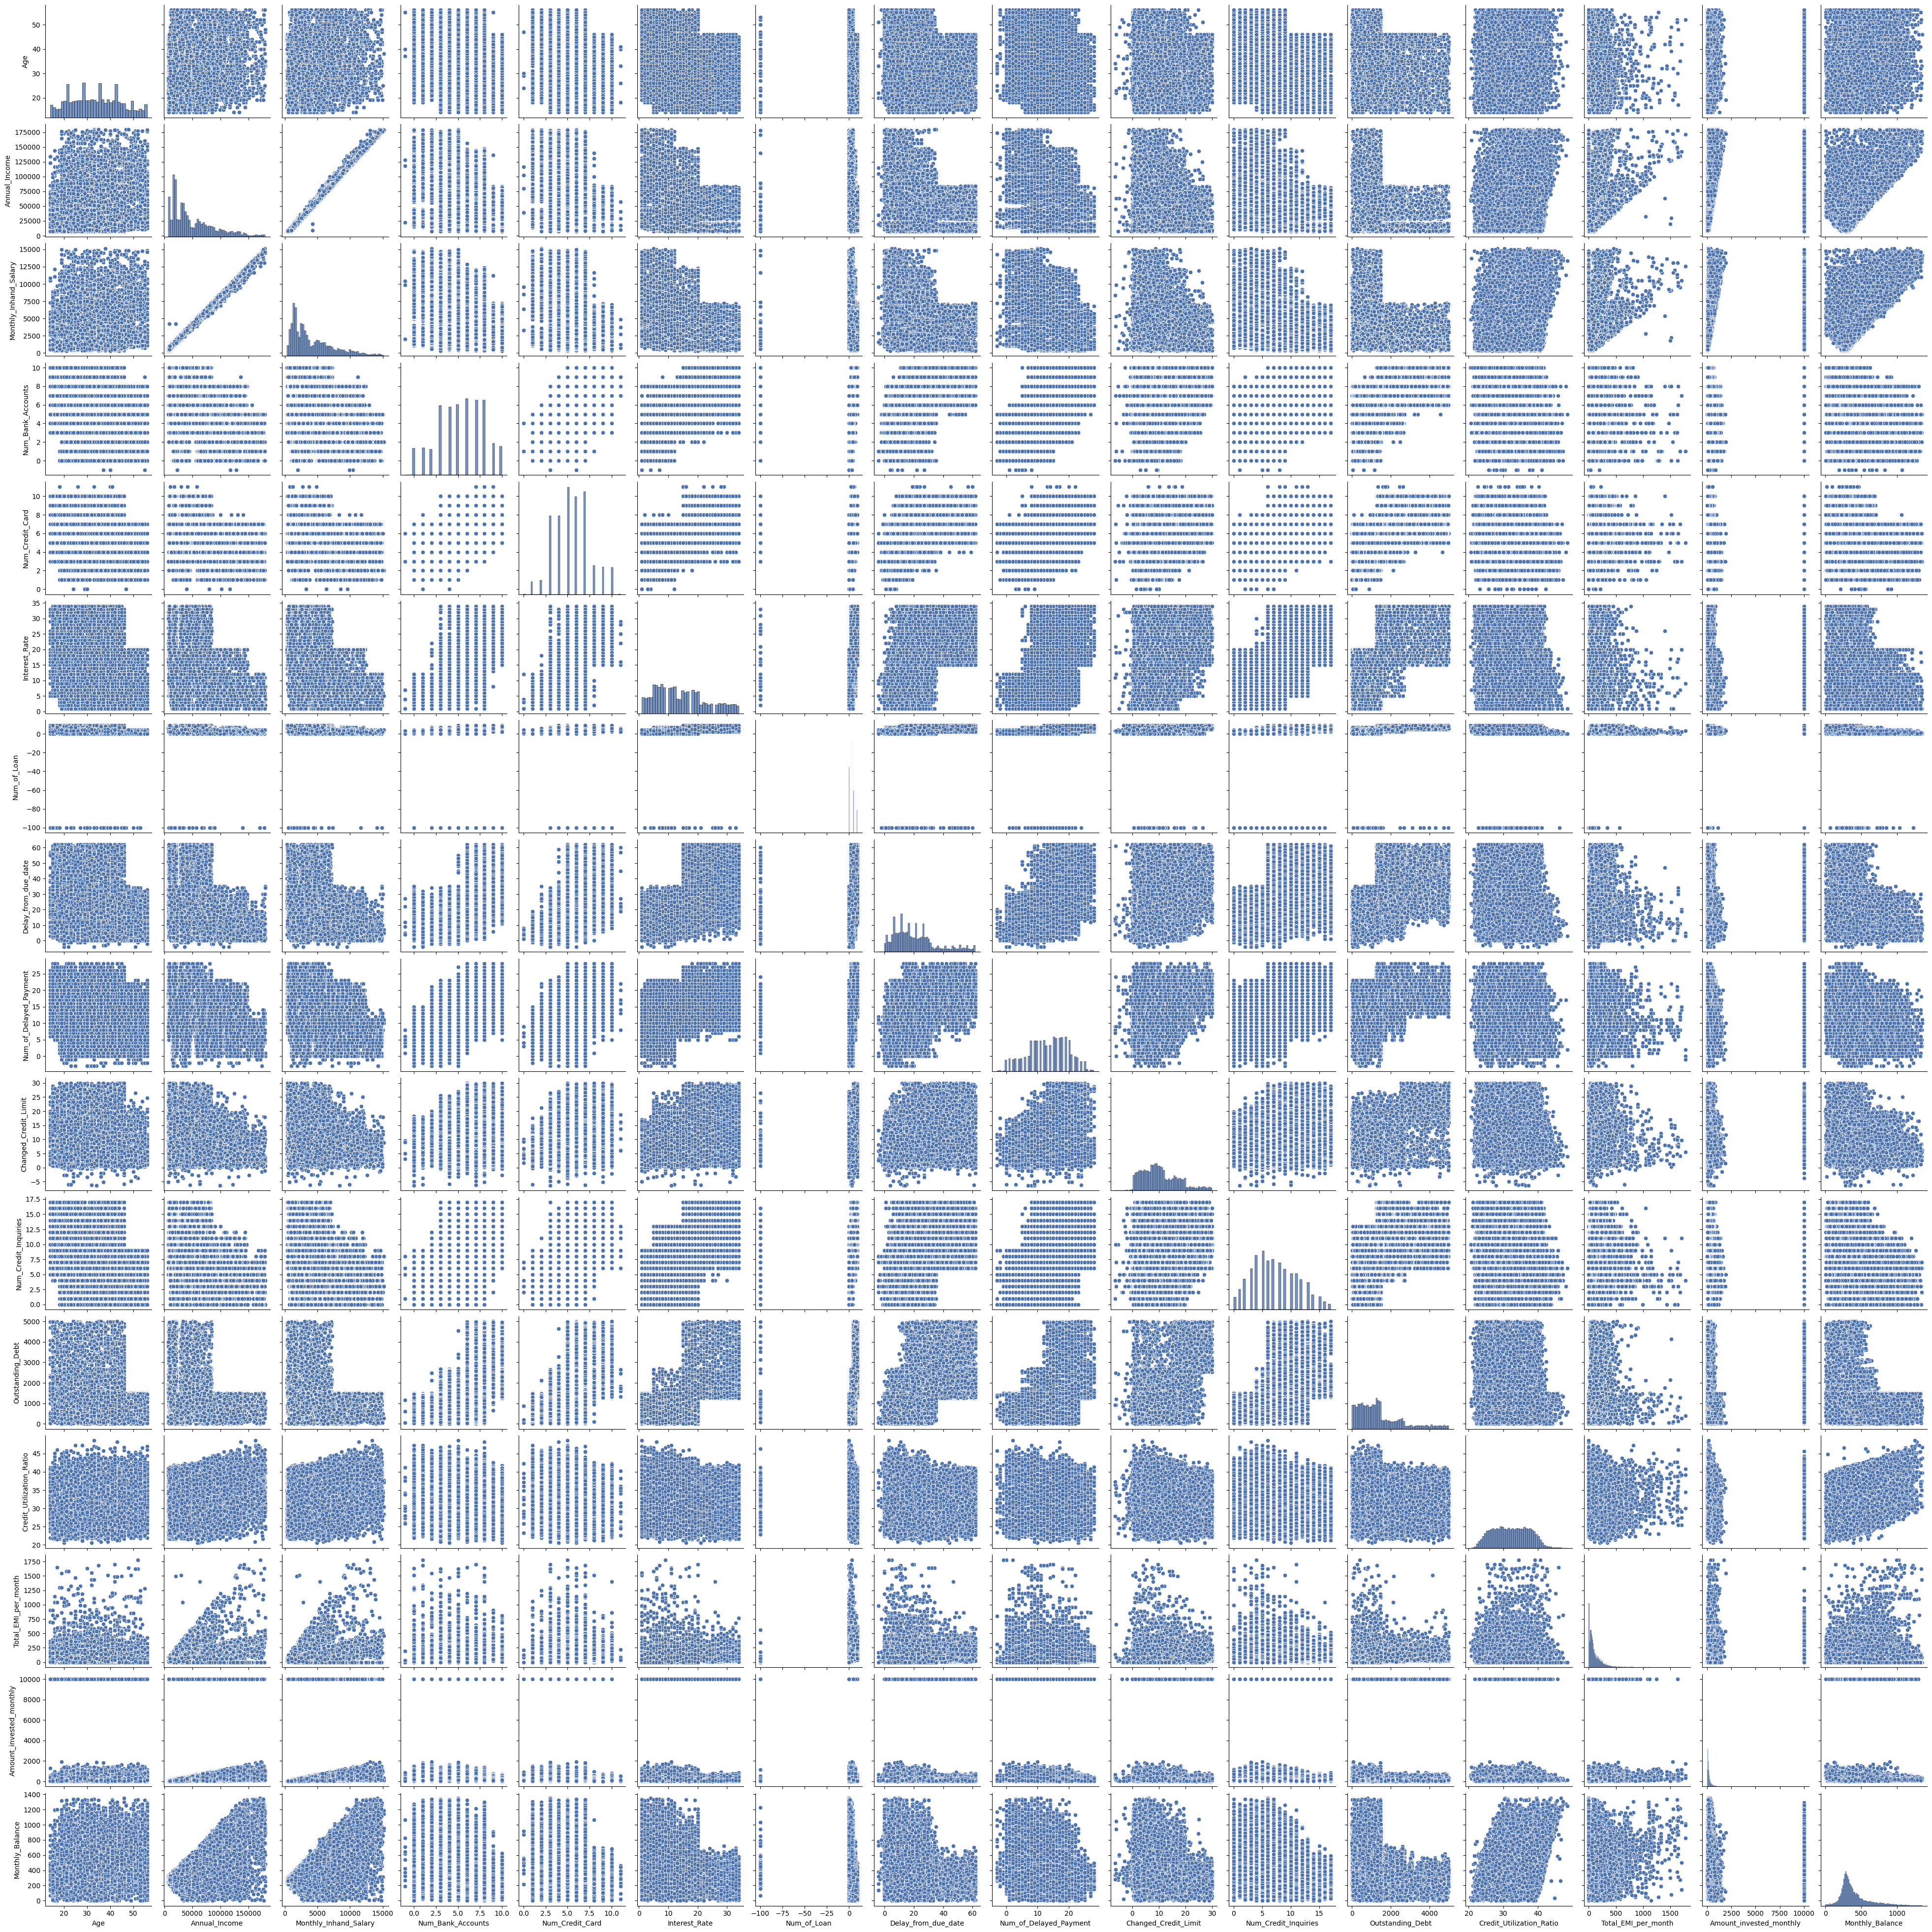

In [ ]:
sns.pairplot(data=df)

In [ ]:
df.corr().T

Age  Annual_Income  Monthly_Inhand_Salary  \
Age                       1.000000       0.092333               0.091202   
Annual_Income             0.092333       1.000000               0.997604   
Monthly_Inhand_Salary     0.091202       0.997604               1.000000   
Num_Bank_Accounts        -0.186044      -0.276378              -0.275188   
Num_Credit_Card          -0.134484      -0.215732              -0.214752   
Interest_Rate            -0.227370      -0.306156              -0.304691   
Num_of_Loan              -0.079478      -0.088873              -0.087850   
Delay_from_due_date      -0.178330      -0.256173              -0.255316   
Num_of_Delayed_Payment   -0.169538      -0.292194              -0.291008   
Changed_Credit_Limit     -0.138350      -0.190928              -0.190195   
Num_Credit_Inquiries     -0.235421      -0.282690              -0.280512   
Outstanding_Debt         -0.197218      -0.266718              -0.265571   
Credit_Utilization_Ratio  0.033340       0.157000               0.157375   
Total_EMI_per_month      -0.037445       0.450271               0.420006   
Amount_invested_monthly   0.007544       0.057330               0.057527   
Monthly_Balance           0.120774       0.683397               0.683653   

                          Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
Age                               -0.186044        -0.134484      -0.227370   
Annual_Income                     -0.276378        -0.215732      -0.306156   
Monthly_Inhand_Salary             -0.275188        -0.214752      -0.304691   
Num_Bank_Accounts                  1.000000         0.440225       0.584053   
Num_Credit_Card                    0.440225         1.000000       0.492003   
Interest_Rate                      0.584053         0.492003       1.000000   
Num_of_Loan                        0.180183         0.146418       0.216426   
Delay_from_due_date                0.552005         0.473864       0.585866   
Num_of_Delayed_Payment             0.608224         0.419676       0.570433   
Changed_Credit_Limit               0.337471         0.260645       0.364734   
Num_Credit_Inquiries               0.499564         0.440496       0.617562   
Outstanding_Debt                   0.508156         0.490780       0.627921   
Credit_Utilization_Ratio          -0.060343        -0.049378      -0.068040   
Total_EMI_per_month                0.000561         0.017984       0.018743   
Amount_invested_monthly           -0.007521        -0.008745      -0.003829   
Monthly_Balance                   -0.294667        -0.236617      -0.335062   

                          Num_of_Loan  Delay_from_due_date  \
Age                         -0.079478            -0.178330   
Annual_Income               -0.088873            -0.256173   
Monthly_Inhand_Salary       -0.087850            -0.255316   
Num_Bank_Accounts            0.180183             0.552005   
Num_Credit_Card              0.146418             0.473864   
Interest_Rate                0.216426             0.585866   
Num_of_Loan                  1.000000             0.184599   
Delay_from_due_date          0.184599             1.000000   
Num_of_Delayed_Payment       0.185348             0.540819   
Changed_Credit_Limit         0.140702             0.290070   
Num_Credit_Inquiries         0.213526             0.521736   
Outstanding_Debt             0.237776             0.572887   
Credit_Utilization_Ratio    -0.046172            -0.062866   
Total_EMI_per_month          0.097863             0.029422   
Amount_invested_monthly     -0.000934            -0.009472   
Monthly_Balance             -0.164975            -0.287602   

                          Num_of_Delayed_Payment  Changed_Credit_Limit  \
Age                                    -0.169538             -0.138350   
Annual_Income                          -0.292194             -0.190928   
Monthly_Inhand_Salary                  -0.291008             -0.190195   
Num_Bank_Accounts                       0.6

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  24.0       19114.12            1824.843333                3.0   
2  24.0       19114.12            1824.843333                3.0   
3  24.0       19114.12            1824.843333                3.0   
4  28.0       34847.84            3037.986667                2.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                  3.0   
2              4.0            3.0          4.0                  3.0   
3              4.0            3.0          4.0                  4.0   
4              4.0            6.0          1.0                  3.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     9.0                 13.27                   4.0   
2                     4.0                 12.27                   4.0   
3                     5.0                 11.27                   4.0   
4                     1.0                  5.42                   5.0   

   Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0           1            809.98                 35.030402   
1           1            809.98                 33.053114   
2           1            809.98                 33.811894   
3           1            809.98                 32.430559   
4           1            605.03                 25.926822   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                      1            49.574949               236.642682   
1                      1            49.574949                21.465380   
2                      1            49.574949               148.233938   
3                      1            49.574949                39.082511   
4                      1            18.816215                39.684018   

   Payment_Behaviour  Monthly_Balance  
0                  5       186.266702  
1                  1       361.444004  
2                  4       264.675446  
3                  1       343.826873  
4                  0       485.298434

([<matplotlib.patches.Wedge at 0x7f72f52b32e0>,
 [Text(0.16423295086702067, 1.0876706936612344, '2'),
  Text(-0.8630768147980694, -0.6819812400337851, '1'),
  Text(0.8031969641188109, -0.7515814239524057, '0')],
 [Text(0.08958160956382945, 0.5932749238152187, '45.23%'),
  Text(-0.4707691717080378, -0.37198976729115546, '30.83%'),
  Text(0.43810743497389687, -0.4099535039740394, '23.94%')])

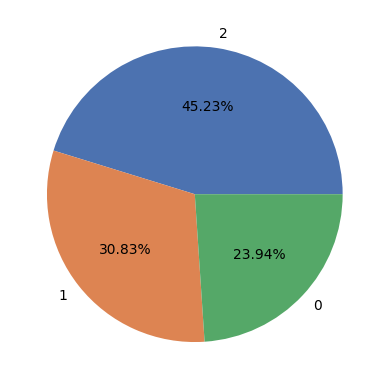

In [ ]:
ser = df["Credit_Mix"].value_counts()
plt.pie(x=ser.values, labels=ser.index, autopct="%0.2f%%", radius=1)

In [ ]:
#Spli Input & Output Data
X = df.drop('Credit_Mix',axis=1)
y = df['Credit_Mix']
print(X.shape)
print(y.shape)

(23856, 18)
(23856,)


In [ ]:
#Normalize Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
#Split Data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(19084, 18)
(4772, 18)
(19084,)
(4772,)


In [ ]:
# List of classifiers to test
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
    #('XGB',xgb.XGBClassifier(),
    ('SVC', SVC())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, xtrain, ytrain, cv=5, scoring='accuracy')

    # Calculate average performance metrics
    avg_accuracy = np.mean(scores)
    avg_precision = cross_val_score(clf, xtrain, ytrain, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, xtrain, ytrain, cv=5, scoring='recall_macro').mean()

    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Decision Tree
Average Accuracy: 0.9646
Average Precision: 0.9665
Average Recall: 0.9662
-----------------------
Classifier: Logistic Regression
Average Accuracy: 0.9140
Average Precision: 0.9163
Average Recall: 0.9174
-----------------------
Classifier: Random Forest
Average Accuracy: 0.9826
Average Precision: 0.9822
Average Recall: 0.9828
-----------------------
Classifier: KNN
Average Accuracy: 0.9248
Average Precision: 0.9247
Average Recall: 0.9305
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.8937
Average Precision: 0.8896
Average Recall: 0.9073
-----------------------
Classifier: SVC
Average Accuracy: 0.9341
Average Precision: 0.9347
Average Recall: 0.9385
-----------------------


In [ ]:
#Method to evaluate the performance of the model
def evaluate_model(ytest,y_pred):
    print("Classification Report")
    print(classification_report(ytest, y_pred))

    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(ytest, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1143
           1       0.99      0.99      0.99      1471
           2       0.99      0.98      0.98      2158

    accuracy                           0.99      4772
   macro avg       0.98      0.99      0.99      4772
weighted avg       0.99      0.99      0.99      4772


---------------------------------------------



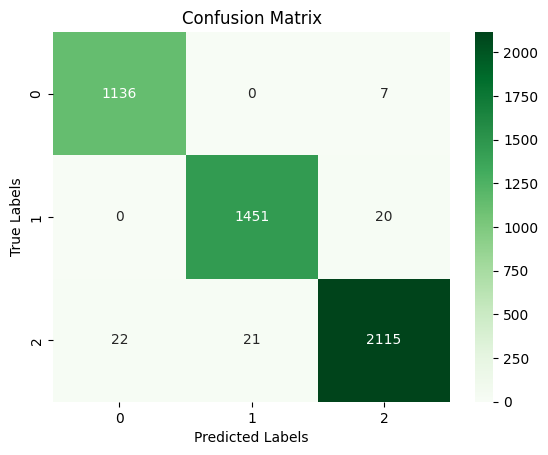

In [ ]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(xtrain, ytrain)

# Making predictions on the test set
y_pred_rfc = rf_classifier.predict(xtest)

# Evaluating the model
evaluate_model(ytest, y_pred_rfc)

# Hyperparameters Tuning On RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params_gscv = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}


In [ ]:
rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rfc,param_grid=params_gscv,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')
grid_search.fit(xtrain, ytrain)

# Get the best parameters and model
best_params_gsCV = grid_search.best_params_
best_model_gsCV = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_gsCV_test = best_model_gsCV.predict(xtest)

mae_gsCV_test = mean_absolute_error(ytest, y_pred_gsCV_test)
mse_gsCV_test = mean_squared_error(ytest, y_pred_gsCV_test)
rmse_gsCV_test = mean_squared_error(ytest, y_pred_gsCV_test, squared=False)
r2_gsCV_test = r2_score(ytest, y_pred_gsCV_test)

print('Best Hyperparameters: ',best_params_gsCV)
print("Mean Absolute Error (MAE) final:", mae_gsCV_test)
print("Mean Squared Error (MSE) final:", mse_gsCV_test)
print("Root Mean Squared Error (RMSE) final:", rmse_gsCV_test)
print("R-squared (R2) score:", r2_gsCV_test)



Fitting 5 folds for each of 300 candidates, totalling 1500 fits


NameError: ignored

In [ ]:
mae_gsCV_test = mean_absolute_error(ytest, y_pred_gsCV_test)
mse_gsCV_test = mean_squared_error(ytest, y_pred_gsCV_test)
rmse_gsCV_test = mean_squared_error(ytest, y_pred_gsCV_test, squared=False)
r2_gsCV_test = r2_score(ytest, y_pred_gsCV_test)

print('Best Hyperparameters: ',best_params_gsCV)
print("Mean Absolute Error (MAE) final:", mae_gsCV_test)
print("Mean Squared Error (MSE) final:", mse_gsCV_test)
print("Root Mean Squared Error (RMSE) final:", rmse_gsCV_test)
print("R-squared (R2) score:", r2_gsCV_test)


Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 8}
Mean Absolute Error (MAE) final: 0.042958927074601846
Mean Squared Error (MSE) final: 0.0660100586756077
Root Mean Squared Error (RMSE) final: 0.25692422749831845
R-squared (R2) score: 0.8978966858570289


score is:- 0.9702430846605197
........................................
mean_sqrd_error is== 0.0643336127409891
mean_absolute_error is== 0.041282481139983236
r2 score== 0.9004897858987552
root_mean_squared error of is== 0.2536407158580599
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1143
           1       0.97      0.97      0.97      1471
           2       0.97      0.96      0.97      2158

    accuracy                           0.97      4772
   macro avg       0.97      0.97      0.97      4772
weighted avg       0.97      0.97      0.97      4772


---------------------------------------------



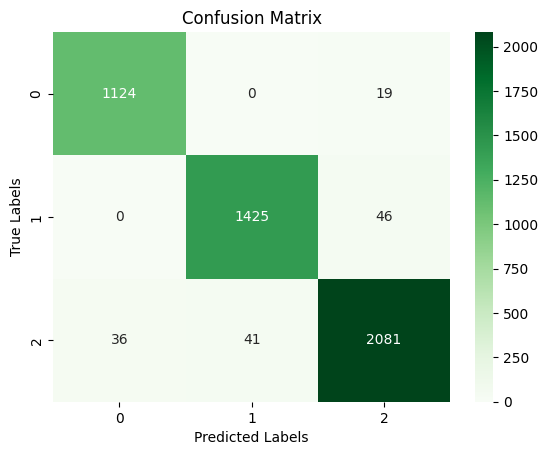

In [ ]:
#Hyperparameters_Chack
rfc_gsCV= RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,min_samples_split=8)

fit_rfc_gsCV= rfc_gsCV.fit(xtrain,ytrain)
rfc_pred_gsCV = rfc_gsCV.predict(xtest)

# Evaluating the model
print('score is:-',rfc_gsCV.score(xtest,ytest))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(ytest,rfc_pred_gsCV))
print('mean_absolute_error is==',mean_absolute_error(ytest,rfc_pred_gsCV))
print('r2 score==',r2_score(ytest,rfc_pred_gsCV))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,rfc_pred_gsCV)))

evaluate_model(ytest, rfc_pred_gsCV)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params_RandomizedSearchCV = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}


In [ ]:
rfc =RandomForestClassifier(random_state=42)
RSCV = RandomizedSearchCV(estimator=rfc,  param_distributions=params_RandomizedSearchCV,cv=5,n_iter=300,n_jobs=-1, verbose=True, scoring='accuracy')
RSCV.fit(xtrain, ytrain)

# Get the best parameters and model
best_params_rsCV = RSCV.best_params_
best_model_rsCV = RSCV.best_estimator_

# Evaluate the best model on the test set
y_pred_rsCV_test = best_model_rsCV.predict(xtest)

mae_rsCV_test = mean_absolute_error(ytest, y_pred_rsCV_test)
mse_rsCV_test = mean_squared_error(ytest, y_pred_rsCV_test)
rmse_rsCV_test = mean_squared_error(ytest, y_pred_rsCV_test, squared=False)
r2_rsCV_test = r2_score(ytest, y_pred_rsCV_test)

print('Best Hyperparameters: ',best_params_rsCV)
print("Mean Absolute Error (MAE) final:", mae_rsCV_test)
print("Mean Squared Error (MSE) final:", mse_rsCV_test)
print("Root Mean Squared Error (RMSE) final:", rmse_rsCV_test)
print("R-squared (R2) score:", r2_rsCV_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Hyperparameters:  {'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 15, 'criterion': 'entropy'}
Mean Absolute Error (MAE) final: 0.040863369656328585
Mean Squared Error (MSE) final: 0.0634953897736798
Root Mean Squared Error (RMSE) final: 0.2519829156385008
R-squared (R2) score: 0.9017863359196182


score is:- 0.9679379715004192
........................................
mean_sqrd_error is== 0.06663872590108968
mean_absolute_error is== 0.04358759430008382
r2 score== 0.8969242733413816
root_mean_squared error of is== 0.2581447770168703
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1143
           1       0.97      0.96      0.97      1471
           2       0.97      0.96      0.96      2158

    accuracy                           0.97      4772
   macro avg       0.97      0.97      0.97      4772
weighted avg       0.97      0.97      0.97      4772


---------------------------------------------



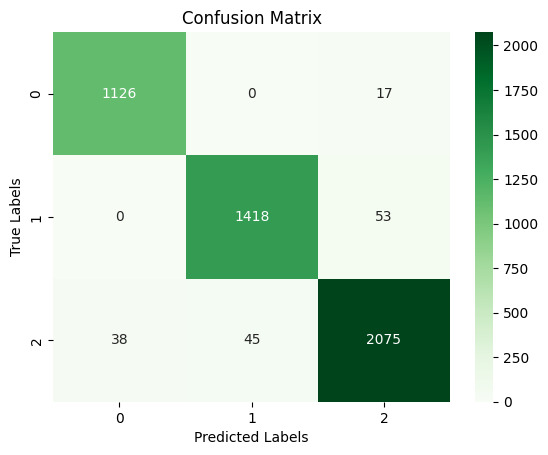

In [ ]:
#Hyperparameters_Chack
rfc_rsCV= RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,min_samples_split=8)

fit_rfc_rsCV= rfc_rsCV.fit(xtrain,ytrain)
rfc_pred_rsCV = rfc_rsCV.predict(xtest)

# Evaluating the model
print('score is:-',rfc_rsCV.score(xtest,ytest))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(ytest,rfc_pred_rsCV))
print('mean_absolute_error is==',mean_absolute_error(ytest,rfc_pred_rsCV))
print('r2 score==',r2_score(ytest,rfc_pred_rsCV))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,rfc_pred_rsCV)))

evaluate_model(ytest, rfc_pred_rsCV)

## The best model is RandomForestClassifier with GridSearchCV